In [2]:
# importar librerías
import boto3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## 1. Descarga de archivos del bucket de s3 (Programático)

In [5]:
## ESTA FUNCION SE ENCUENTRA EN LA CARPETA 1.programatico EN EL ARCHIVO programatico_descarga.
# Si ya has descargado los archivos no es necesario que lo vuelvas a hacer
'''
#función para descargar los archivos del bucket
from dotenv import load_dotenv
#Declaro estas variable como globales ya puede ser que las necesite en varias funciones y no las voy a modificar.
load_dotenv() #inicializar la clase dotenv 
AccessKey= os.getenv('ACCESSKEY')
SecretKey= os.getenv('SECRETKEY')

def download_s3_data(file_name, file_path, bucket_name='desafio-rkd'):
    
    #Esta función recibe se conecta a un bucket s3 de Amazon y descarga un archivo. 
    #tiene 3 parametros de los cuales los primeros 2 son obligatorio: Nombre del archivos (especificar la extención) y
    #ruta donde se almacenará la descarga. Puede ser absoluta o relativa
    #El último es el nombre del bucket y es opcional, ya que por default es: desafio-rkd.
    

    session = boto3.Session(aws_access_key_id=AccessKey, aws_secret_access_key=SecretKey)
    s3 = session.resource('s3')
    s3.Bucket(bucket_name).download_file(file_name, file_path)
    print(f'{file_name} descargado en {file_path}')

# Uso la función con los parämetros necesarios, de forma flexible - uso rutas absolutas para evitar problemas
download_s3_data('disney_plus_titles.csv', '../disney.csv')
download_s3_data('netflix_titles.csv', '../neflix.csv')
'''

"\n#función para descargar los archivos del bucket\nfrom dotenv import load_dotenv\n#Declaro estas variable como globales ya puede ser que las necesite en varias funciones y no las voy a modificar.\nload_dotenv() #inicializar la clase dotenv \nAccessKey= os.getenv('ACCESSKEY')\nSecretKey= os.getenv('SECRETKEY')\n\ndef download_s3_data(file_name, file_path, bucket_name='desafio-rkd'):\n    \n    #Esta función recibe se conecta a un bucket s3 de Amazon y descarga un archivo. \n    #tiene 3 parametros de los cuales los primeros 2 son obligatorio: Nombre del archivos (especificar la extención) y\n    #ruta donde se almacenará la descarga. Puede ser absoluta o relativa\n    #El último es el nombre del bucket y es opcional, ya que por default es: desafio-rkd.\n    \n\n    session = boto3.Session(aws_access_key_id=AccessKey, aws_secret_access_key=SecretKey)\n    s3 = session.resource('s3')\n    s3.Bucket(bucket_name).download_file(file_name, file_path)\n    print(f'{file_name} descargado en {

In [3]:
# guardar los datos en df
disney = '../disney.csv'
netflix = '../netflix.csv' 

df_disney = pd.read_csv(disney, delimiter=",")
df_netflix = pd.read_csv(netflix, delimiter=";")


# 2. Explorando los datos (QA)

## A) Comenzamos con el archivo de Disney

In [7]:
#ver un ejemplo del dataset
df_disney.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
604,s605,Movie,Frozen 2,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",United States,"March 14, 2020",2019,PG,107 min,"Action-Adventure, Animation, Family",Elsa journeys into the unknown to uncover trut...
95,s96,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
1308,s1309,Movie,The Muppet Christmas Carol,Brian Henson,"Michael Caine, Steve Whitmire, Frank Oz, Dave ...","United States, United Kingdom","November 12, 2019",1992,G,87 min,"Comedy, Drama, Family",The Muppets present their own touching renditi...
469,s470,Movie,Lost City of Machu Picchu,NaN,Craig Sechler,United States,"July 17, 2020",2019,TV-14,44 min,"Documentary, Family",Who were the mysterious people who built Machu...
1297,s1298,Movie,The Little Mermaid,"Ron Clements, John Musker","René Auberjonois, Christopher Barnes, Jodi Ben...",United States,"November 12, 2019",1989,G,86 min,"Animation, Family, Fantasy",Dive into Disney fun with Ariel in The Little ...


In [8]:
# que hay en cada columna
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## Calidad del dato

### Vamos a ver cuanto en % representan los nulos para ver si son representativos 
## Es importante si hay número representativo indagar las causas y proponer soluciones

In [9]:
# veo % de nulos en todo el dataset
def show_nulls(df):
    na_ratio = (df.isnull().sum() / len((df))*100).sort_values(ascending = False)
    print(na_ratio)

In [10]:
show_nulls(df_disney)

director        32.620690
country         15.103448
cast            13.103448
date_added       0.206897
rating           0.206897
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


Hay muchos datos faltantes en **"director"**. Pienso que un motivo puede ser duplicados o qué muchas series a veces cambian de director y no afectan significativamente. Se recomienda hablar con el cliente para preguntar la implicancia de estos faltantes.

In [4]:
#veo si hay algún patrón en la columna director
director_tv_show_na = df_disney[(df_disney['director'].isna()) & (df_disney['type']=='TV Show')].shape[0]
director_movie_na = df_disney[(df_disney['director'].isna()) & (df_disney['type']=='Movie')].shape[0]

In [5]:
print(f'El total de datos faltantes para directores de peliculas es {round((director_movie_na/df_disney.shape[0])*100, 3)} %')
print(f'El total de datos faltantes para directores de series es {round((director_tv_show_na/df_disney.shape[0]*100), 3)} %')

El total de datos faltantes para directores de peliculas es 5.172 %
El total de datos faltantes para directores de series es 27.448 %


Esto tiene sentido ya que en general las series pueden ir cambiando de director y la información no se complete. 
Se propone charlar con el cliente si es viable adquirir la información desde otra fuente de datos (si realmente aporta valor) o si sería mejor incluír info adicional como por ej para series quien/es es/son los showrunners.

In [13]:
# Faltantes en "countries" - No hay un patrón obvio para estos faltantes.
df_disney[df_disney['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,s1137,Movie,Planet of the Birds,NaN,Rodd Houston,NaN,"November 12, 2019",2018,TV-PG,45 min,"Animals & Nature, Documentary, Family","Tough and versatile, birds live in almost ever..."
1204,s1205,TV Show,Spider-Man (Shorts),NaN,NaN,NaN,"November 12, 2019",2016,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Peter uses science to investigate his spider b...
1210,s1211,TV Show,Star Wars Rebels (Shorts),NaN,NaN,NaN,"November 12, 2019",2014,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",It is a dark time in the galaxy as the Empire ...
1259,s1260,TV Show,The Book of Once Upon a Time,NaN,Kate Mulvany,NaN,"November 12, 2019",2014,TV-Y,4 Seasons,"Animation, Anthology, Kids",Classic Disney tales are brought to life in a ...


In [14]:
# vemos si hay algo llamativo en los nulos de cast y puede ser que algunos faltantes se relacionen con el tiempo. 
# para poder verificarlo es necesario abrir la columna "duration" y dejar sólo el numero
df_disney[df_disney['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
11,s12,Movie,Puppy for Hanukkah,NaN,NaN,NaN,"November 19, 2021",2020,TV-G,4 min,"Comedy, Family, Music","Check out Daveed Digg's official music video ""..."
15,s16,Movie,Baymax!,NaN,NaN,NaN,"November 12, 2021",2021,TV-G,1 min,Animation,“Baymax!” premieres on Disney+ summer 2022.
26,s27,Movie,Marvel Studios’ 2021 Disney+ Day Special,NaN,NaN,NaN,"November 12, 2021",2021,TV-PG,14 min,Movies,Marvel Studios’ Disney+ Day Special explores t...
27,s28,Movie,Obi-Wan Kenobi,NaN,NaN,NaN,"November 12, 2021",2021,TV-PG,1 min,"Action-Adventure, Science Fiction","A behind the scenes look of the ""Obi-Wan Kenob..."
35,s36,Movie,The Little Matchgirl,Roger Allers,NaN,United States,"November 12, 2021",2006,G,7 min,"Animation, Drama",A poor matchgirl sees happy images in the flam...
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,s1364,Movie,Three Little Wolves,Dave Hand,NaN,United States,"November 12, 2019",1936,TV-Y7,9 min,"Animation, Family",Two frivolous pigs blow the wolf horn one too ...
1375,s1376,Movie,Toby Tortoise Returns,Wilfred Jackson,NaN,United States,"November 12, 2019",1936,TV-Y7,8 min,"Animation, Family, Sports",Max Hare and Toby Tortoise are opponents in a ...
1384,s1385,Movie,Trailer Horn,Jack Hannah,NaN,United States,"November 12, 2019",1950,TV-G,7 min,"Animation, Comedy, Family",Donald heads out for a nice relaxing camping t...
1411,s1412,Movie,Winter Storage,Jack Hannah,NaN,United States,"November 12, 2019",1949,TV-G,7 min,"Animation, Comedy, Family",Donald and Chip and Dale face off over acorns....


In [7]:
# hago una copia para no afectar el original y si todo sigue ok lo remplazo al final
df_disney_copy = df_disney.copy()

In [16]:
#usando regex?
#df_disney_copy[['duration_num','duration_unit']] = df_disney_copy['duration'].str.extract('(\d+) (\w+)')

In [19]:
# funcion para poder ser reutilizada luego mejor
def extract_duration_info(duration):

    '''esta funcion toma como argumento un string que contiene la duración (en minutos o season) y las separa en dos (num y unit). 
    Devuelve en tupla dichos valores '''
    split = duration.split(" ")
    num = int(split[0])
    unit = split[1]
    return num, unit

In [9]:
df_disney_copy["duration_num"] = df_disney_copy["duration"].apply(lambda x: extract_duration_info(x)[0])
df_disney_copy["duration_unit"] = df_disney_copy["duration"].apply(lambda x: extract_duration_info(x)[1])

In [10]:
#Chequeamos que se haya aplicado bien la funcion. De momento no voy a eliminar la columma duration
df_disney_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,23,min
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,91,min
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23,min


In [20]:
# ahora podemos ver si la duración se relaciona con los nulos

df_disney_copy[(df_disney_copy['cast'].isna()) & (df_disney_copy['duration_unit'] == 'min')].describe()

,release_year,duration_num
count,119.000000,119.000000
mean,1977.218487,20.773109
std,36.765441,31.828576
min,1932.000000,1.000000
25%,1942.000000,7.000000
50%,1954.000000,8.000000
75%,2019.000000,10.500000
max,2021.000000,182.000000


In [21]:
#veamos aquellos que duran mäs de 15mins
df_disney_copy[(df_disney_copy['cast'].isna()) & (df_disney_copy['duration_unit'] == 'min') & (df_disney_copy['duration_num'] > 15) ].sort_values(['duration_num'], ascending=False).head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
333,s334,Movie,Dory's Reef Cam,Michal Makarewicz,NaN,United States,"December 18, 2020",2020,TV-G,182 min,"Animation, Family",Dive into the waters below and watch the aquat...,182,min
330,s331,Movie,Arendelle Castle Yule Log,NaN,NaN,United States,"December 18, 2020",2020,TV-G,180 min,"Animation, Family",Set the wintry mood for your holiday celebrati...,180,min


## conclusión valores nulos
Los tres con mayores valores nulos son 
-  Country
- Director
- Cast

Los últimos dos están justificados desde el punto de vista que en el caso de director la mayoría de los faltantes se dan en series. En cuanto a cast, el 75% consta de menos de 11 minutos de duración por lo que puede ser un trailer, promoción o mini corto y tiene sentido que no tenga cast. Aquellos de mayor duración, varios son animados, biográficos o de animales por lo cuál también tiene sentido que no tengan elenco. 
Las faltas en countries no tienen una explicación clara por lo que se recomienda solicitar fuente de datos alternativas para cubrir esos faltantes.

## outliers y out of range  

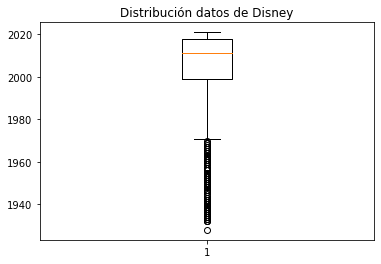

In [16]:
## veamos las fechas de lanzamiento
plt.boxplot(df_disney_copy['release_year'])
plt.title("Distribución datos de Disney")
plt.show()

In [22]:
## veamos si hay los max min y promedio separado por películas y series
#df_disney_copy.describe()
df_disney_copy.groupby('type').describe()

release_year                                                          \
               count         mean        std     min     25%     50%     75%   
type                                                                           
Movie         1052.0  1999.230989  23.858584  1928.0  1994.0  2008.0  2017.0   
TV Show        398.0  2013.296482   9.659051  1955.0  2011.0  2017.0  2019.0   

                duration_num                                               \
            max        count       mean        std  min   25%   50%   75%   
type                                                                        
Movie    2021.0       1052.0  71.910646  40.595585  1.0  44.0  85.0  98.0   
TV Show  2021.0        398.0   2.118090   2.411898  1.0   1.0   1.0   2.0   

                
           max  
type            
Movie    183.0  
TV Show   32.0

Vemos que casi 3 veces más pelïculas que series. 
La  mayoría de las películas duran menos de 98 minutos y la mayoría de las series duran menos de 2. 

In [48]:
#El máx de 32 season suena mucho así que lo voy a mirar.
df_disney_copy[(df_disney_copy['duration_num'] > 7) & (df_disney_copy['duration_unit'] == "Seasons") ]
# La cantidad de season esta OK. Los simpson tienen 32 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",10,Seasons
92,s93,TV Show,The Simpsons,NaN,"Dan Castellaneta, Julie Kavner, Nancy Cartwrig...",United States,"September 29, 2021",1989,TV-PG,32 Seasons,"Animation, Comedy","The world’s favorite nuclear family, in the aw...",32,Seasons
106,s107,TV Show,Life Below Zero,NaN,"Chip Hailstone, Agnes Hailstone, Sue Aikens, A...",United States,"September 15, 2021",2012,TV-14,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries",Experience life deep in Alaska where the prima...,16,Seasons
115,s116,TV Show,The Incredible Dr. Pol,NaN,"Rick Robles, Dr. Pol",United States,"September 8, 2021",2011,TV-14,19 Seasons,"Animals & Nature, Docuseries, Family",Dr. Pol and his team handle challenging veteri...,19,Seasons
125,s126,TV Show,Dr. K's Exotic Animal ER,NaN,"Dr. Susan Kelleher, Art Edmonds",NaN,"August 25, 2021",2014,TV-14,9 Seasons,"Animals & Nature, Docuseries, Family",Dedicated veterinarians treat a colorful array...,9,Seasons
216,s217,TV Show,Wicked Tuna,NaN,Mike Rowe,United States,"May 28, 2021",2016,TV-14,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries",Massachusetts fishermen make their living one ...,10,Seasons
285,s286,TV Show,Car SOS,NaN,NaN,United Kingdom,"February 26, 2021",2012,TV-PG,8 Seasons,"Buddy, Comedy, Docuseries",Decaying classic cars are revived by two exper...,8,Seasons
553,s554,TV Show,America's Funniest Home Videos,NaN,Tom Bergeron,United States,"April 24, 2020",1989,TV-PG,9 Seasons,"Comedy, Family, Fantasy",Home videos compete for cash prizes. Program i...,9,Seasons
557,s558,TV Show,Brain Games,NaN,Neil Harris,United States,"April 17, 2020",2011,TV-G,8 Seasons,"Docuseries, Family, Game Show / Competition",Brain Games features games & experiments revea...,8,Seasons


## Valores duplicados en Disney

In [22]:
#Primero chequear que los números de Ids sean correctos - debería haber 1450 (total de registros)
df_disney['show_id'].unique().size

1450

In [23]:
# Otra forma que tal vez funciona para ver si hay shows duplicados es por nombre o por descripción del mismo. Esto no es perfecto pero puede ser un pequeño filtro
# la columna más representativa es "description" por lo que puede ser que si hay repetidos una forma es encontrarlos allí

#contar los posibles repetidos según descripción o título
def duplicates_shows(df): 
    des_count = df['description'].value_counts()
    title_count = df['title'].value_counts()
    # guardar los posibles duplicados en un df
    duplicados = df[ (df['description'].isin(des_count.index[des_count > 1])) | (df['title'].isin(title_count.index[title_count > 1])) ].sort_values(by = ['title', 'description'])
    return duplicados
#sort_values(by = ['description'])

In [24]:
# ver si realmente son duplicados  y la posible razón: una película o serie puede estar en más de un idioma o separada por temporadas.
duplicates_shows(df_disney)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
699,s700,Movie,Coco,Lee Unkrich,"Anthony Gonzalez, Gael Bernal, Benjamin Bratt,...",United States,"November 29, 2019",2017,PG,105 min,"Animation, Family, Fantasy",Miguel journeys to the magical land of his anc...
700,s701,Movie,Coco (in Spanish),Lee Unkrich,"Anthony Gonzalez, Gael García Bernal, Benjamin...",NaN,"November 29, 2019",2017,PG,105 min,"Animation, Family, Fantasy",Miguel journeys to the magical land of his anc...
406,s407,TV Show,Coop & Cami Ask The World,NaN,"Ruby Turner, Dakota Lotus, Olivia Sanabia, Alb...",United States,"September 18, 2020",2018,TV-G,2 Seasons,"Comedy, Family, Kids","Cooper and Cami Wrather co-host ""Would You Wra..."
799,s800,TV Show,Coop & Cami Ask The World (Shorts),NaN,NaN,NaN,"November 12, 2019",2018,TV-G,1 Season,"Comedy, Family, Game Show / Competition","Cooper and Cami Wrather co-host ""Would You Wra..."


## Validación de tipo de datos. 
### La mayoría de datos son de tipo object. Lo cual no estaría mal. Cambiamos el tipo de dato fecha de la columna date_added

In [25]:
# chequear el df
df_disney_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,23,min
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,91,min
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23,min
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",41,min
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,108,min
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,106,min
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",107,min
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,112,min


In [26]:
# Vemos que tipos de datos hay en Rating - ok 
df_disney['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

## Veamos el dataset de netflix ahora

In [27]:
df_netflix.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7664,s7665,Movie,One More Shot,Noah Moskin,NaN,United States,"January 15, 2018",2017,TV-MA,89 min,Documentaries,Infertility affects millions. One couple copes...
6009,s6010,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,"January 5, 2019",2016,TV-PG,124 min,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...


In [28]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
# % nulos en el dataset
show_nulls(df_netflix)

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [30]:
## veamos si los faltantes en director son similares al otro archivo

In [31]:
#veo si hay algún patrón en la columna director
director_tv_show_na_net = df_netflix[(df_netflix['director'].isna()) & (df_netflix['type']=='TV Show')].shape[0]
director_movie_na_net = df_netflix[(df_netflix['director'].isna()) & (df_netflix['type']=='Movie')].shape[0]

In [32]:
print(f'El total de datos faltantes para directores de peliculas es {round((director_movie_na_net/df_netflix.shape[0])*100, 3)} %')
print(f'El total de datos faltantes para directores de series es {round((director_tv_show_na_net/df_netflix.shape[0]*100), 3)} %')

El total de datos faltantes para directores de peliculas es 2.135 %
El total de datos faltantes para directores de series es 27.773 %


Lo mismo que en el otro archivo
Esto tiene sentido ya que en general las series pueden ir cambiando de director y la información no se complete. 
Se propone charlar con el cliente si es viable adquirir la información desde otra fuente de datos (si realmente aporta valor) o si sería mejor incluír info adicional como por ej para series quien/es es/son los showrunners.

### Valores duplicados en Netflix

In [33]:
## Chequear que no haya Ids duplicadas
if df_netflix.shape[0] == df_netflix['show_id'].unique().size:
    print('no hay duplicados') 
else:
    print('hay al menos 1 Id duplicado')     

no hay duplicados


In [34]:
#posibles shows duplicados
duplicates_shows(df_netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3962,s3963,Movie,15 August,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
4522,s4523,Movie,22 July,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5965,s5966,Movie,22-jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
851,s852,Movie,99 Songs (Tamil),NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs (Telugu),NaN,NaN,NaN,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,"February 27, 2020",2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...
1982,s1983,Movie,Anaamika,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",India,"September 17, 2020",2014,TV-14,130 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...


Hay en total 59 shows que parecen repetirse (si vemos la descripción) aunque hay muchas que se deben a estar en diferente idioma o tener diferentes temporadas. Se dejaran por el momento y se preguntarä al cliente si es relevante identificar a cada película cómo unica dependiendo el idioma

In [35]:
#veamos si los valores de rating son los mismo que en el otro archivo
print(df_disney_copy['rating'].unique().tolist())
print(df_netflix['rating'].unique().tolist())

['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y', 'TV-Y7-FV']
['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan, 'TV-Y7-FV', 'UR']


Despuës de investigar cuales eran los existentes, encontramos varios problemas. Se plantea unificar todo para que queden de forma correcta y utilizar sólo los vigentes. Aquellos valores nulos, númericos que no existen en dicha clasificación se deberían remplazr por UR o NR (unrated o not rated). Se va a tratar cuando se unan las tablas

In [36]:
##vista rápida de ambas tablas
#netflix
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [37]:
df_disney.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


Voy a unir las tablas ya que son muy parecidas, pero antes voy a agregar una columna de plataforma y cambiar los Ids para que sean identificativos

In [6]:
#Agrego las una columna al final con las plataformas
df_disney['platform'] = 'Disney'
df_netflix['platform'] = 'Netflix'

In [7]:
## voy a remplazar los ids para que no se pisen, sustituyendo s por la primer letra de la plataforma
df_disney['show_id'] = df_disney['show_id'].str.replace('s','D')
df_netflix['show_id'] = df_netflix['show_id'].str.replace('s','N')

In [40]:
#veo cuantas filas debe tener
df_netflix.shape[0]+df_disney.shape[0]

10257

In [8]:
# Uno las dos tablas en una sola
df_shows = pd.concat([df_disney, df_netflix])

In [9]:
#chequeo la cantidad de filas   
df_shows.shape[0]

10257

In [43]:
#veamos la tabla
df_shows.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
5454,N5455,Movie,Love.com,Anita Barbosa,"Isis Valverde, Gil Coelho, Joaquim Lopes, Caro...",Brazil,"June 1, 2017",2017,TV-MA,92 min,"Comedies, International Movies, Romantic Movies",When a fashion blogger falls for a video game ...,Netflix
4005,N4006,Movie,Girl,Lukas Dhont,"Victor Polster, Arieh Worthalter, Oliver Bodar...","Netherlands, Belgium","March 15, 2019",2018,R,106 min,"Dramas, International Movies, LGBTQ Movies",Fifteen-year-old ballet dancer Lara faces phys...,Netflix
1066,D1067,Movie,Meet the Deedles,Steve Boyum,"Paul Walker, Steve Wormer, John Ashton, A.J. L...",United States,"November 12, 2019",1998,PG,94 min,"Buddy, Comedy",Two surfer dudes try to stop an ex-park ranger...,Disney


In [10]:
#Antes de unirlas voy a arreglar lo de rating en Netflix. Podemos cambiar el género también para que sea más descriptivo
df_shows[ (df_shows['rating'] == '74 min') | (df_shows['rating'] ==  '84 min') | (df_shows['rating'] ==  '66 min') ] ##podria usarse is in tmb

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
5541,N5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Netflix
5794,N5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Netflix
5813,N5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,Netflix


In [11]:
# cambiamos y remplazamos tanto la columna rating, como duration. Podemos cambiar el género también para que sea más descriptivo
df_shows['duration'] = np.where(df_shows['show_id'].isin(['N5542', 'N5795', 'N5814']), df_shows['rating'], df_shows['duration'])
df_shows['rating'] = np.where(df_shows['show_id'].isin(['N5542', 'N5795', 'N5814']), 'NR', df_shows['rating'])
df_shows['listed_in'] = np.where(df_shows['show_id'].isin(['N5542', 'N5795', 'N5814']), 'Comedy', df_shows['listed_in'])

In [12]:
#veamos como queda
df_shows[df_shows['show_id'].isin(['N5542', 'N5795', 'N5814'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
5541,N5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Comedy,"Louis C.K. muses on religion, eternal love, gi...",Netflix
5794,N5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Comedy,Emmy-winning comedy writer Louis C.K. brings h...,Netflix
5813,N5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Comedy,The comic puts his trademark hilarious/thought...,Netflix


In [13]:
# voy a llenar los NaN con UR (ya que no tienen raiting)
df_shows['rating'] = df_shows['rating'].fillna('NR')

In [14]:
df_shows['date_added']= pd.to_datetime(df_shows['date_added'])

In [15]:
# veamos cual es la fecha minima a la que pudo ingresar a la plataforma
df_shows['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [17]:
#y lo remplazamos por eso
df_shows['date_added'] = df_shows['date_added'].fillna('2008-01-01 00:00:00')

In [20]:
## utilizamos la función que creamos anteriormente para ver faltantes para separar las columnas de duración en numero y tipo para que sea más facil de cuantificar en el futuro
df_shows["duration_num"] = df_shows["duration"].apply(lambda x: extract_duration_info(x)[0])
df_shows["duration_unit"] = df_shows["duration"].apply(lambda x: extract_duration_info(x)[1])

In [21]:
# Elimino la columna de duration ya que la información sigue existiendo en columnas separadas (se puede recrear con un concat)
df_shows = df_shows.drop(['duration'], axis=1)

In [22]:
df_shows.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,platform,duration_num,duration_unit
5809,N5810,Movie,XOXO,Christopher Louie,"Sarah Hyland, Graham Phillips, Chris D'Elia, H...",United States,2016-08-26,2016,TV-MA,"Dramas, Music & Musicals","The lives of a budding DJ, his loyal pal, a ho...",Netflix,92,min


In [23]:
#voy a llenar las algunas columnas que necesito tener completas para usar como PK. Por el momento les voy a decir "desconocido" y no considero eliminar datos sin antes consultar con el cliente
df_shows[['director', 'cast', 'country', 'listed_in']] = df_shows[['director', 'cast', 'country', 'listed_in']].fillna('unknown')

In [55]:
## veamos cómo queda la tabla final para empezar a normalizarla.
df_shows.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,platform,duration_num,duration_unit
8744,N8745,Movie,Williams,Morgan Matthews,unknown,United Kingdom,2017-11-04,2017,TV-MA,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,Netflix,105,min


In [26]:
# voy a renombrar el show_id para que quede consistente con los otros ids y el de listed_in para que sea más descriptivo

df_shows.rename(columns={"show_id": "id_show", "listed_in": "genres" }, inplace=True)

In [27]:
#copia
df_shows_cop = df_shows.copy()

In [28]:
df_shows_cop

,id_show,type,title,director,cast,country,date_added,release_year,rating,genres,description,platform,duration_num,duration_unit
0,D1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",unknown,2021-11-26,2016,TV-G,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney,23,min
1,D2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",unknown,2021-11-26,1988,PG,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney,91,min
2,D3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney,23,min
3,D4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",unknown,2021-11-26,2021,TV-PG,Musical,"This is real life, not just fantasy!",Disney,41,min
4,D5,TV Show,The Beatles: Get Back,unknown,"John Lennon, Paul McCartney, George Harrison, ...",unknown,2021-11-25,2021,NR,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,N8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix,158,min
8803,N8804,TV Show,Zombie Dumb,unknown,unknown,unknown,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix,2,Seasons
8804,N8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix,88,min
8805,N8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix,88,min


In [59]:
# se exporta el df como archivo .csv en la carpeta de modelado para poder acceder fácilmente a los datos transformados del dataframe
df_shows_cop.to_csv('../3_Modelado/tablas/df_shows.csv', index=False)

## creamos las tablas

Tabla prrincipal. Shows (programas)

In [29]:
#tabla principal
shows = df_shows[['id_show', 'type', 'title', 'country', 'date_added',	'release_year',	'rating', 'description', 'duration_num', 'duration_unit', 'platform']]

In [30]:
shows.head()

,id_show,type,title,country,date_added,release_year,rating,description,duration_num,duration_unit,platform
0,D1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,unknown,2021-11-26,2016,TV-G,Join Mickey and the gang as they duck the halls!,23,min,Disney
1,D2,Movie,Ernest Saves Christmas,unknown,2021-11-26,1988,PG,Santa Claus passes his magic bag to a new St. ...,91,min,Disney
2,D3,Movie,Ice Age: A Mammoth Christmas,United States,2021-11-26,2011,TV-G,Sid the Sloth is on Santa's naughty list.,23,min,Disney
3,D4,Movie,The Queen Family Singalong,unknown,2021-11-26,2021,TV-PG,"This is real life, not just fantasy!",41,min,Disney
4,D5,TV Show,The Beatles: Get Back,unknown,2021-11-25,2021,NR,A three-part documentary from Peter Jackson ca...,1,Season,Disney


In [62]:
#creamos una tabla sólo con columnas de tipo de show (serie o peli)
intermediate_tables_show_type = shows[['id_show', 'type']]

In [63]:
#le asigno un Id númerico autoincremental (1 y 2)
intermediate_tables_show_type['id_type'] = shows.groupby(['type']).ngroup()+1

/var/folders/9y/hwhn13gx33x0n3fjt7f9k0y00000gn/T/ipykernel_3008/3090981915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_tables_show_type['id_type'] = shows.groupby(['type']).ngroup()+1


In [64]:
#Creo una tabla intermedia donde estä la relaciön entre los shows y el tipo de shows
intermediate_tables_show_type

,id_show,type,id_type
0,D1,Movie,1
1,D2,Movie,1
2,D3,Movie,1
3,D4,Movie,1
4,D5,TV Show,2
...,...,...,...
8802,N8803,Movie,1
8803,N8804,TV Show,2
8804,N8805,Movie,1
8805,N8806,Movie,1


In [65]:
# Eliminar filas duplicadas en la tabla intermedia
show_type = intermediate_tables_show_type.drop_duplicates(subset='type')

# Seleccionar solo las columnas 'id_type' y 'tipo'
show_type  = show_type [['id_type', 'type']]

Tabla de typo de shows (series o pelis)

In [1]:
show_type

NameError: name 'show_type' is not defined

In [67]:
# se exporta el df como archivo .csv en la carpeta de modelado para poder ser utilizado para poblar las tablas luego del modelado
show_type.to_csv('../3_Modelado/tablas/show_type.csv', index=False)

In [68]:
shows = pd.merge(shows, show_type, left_on='type', right_on='type', how='left')

In [69]:
##comprobar que se haya cargado todo ook
shows[ ((shows['type'] == 'Movie') & (shows['id_type'] == 2)) |  ((shows['type'] == 'TV Show') & (shows['id_type'] == 1)) ]

,id_show,type,title,date_added,release_year,rating,description,duration_num,duration_unit,platform,id_type


In [70]:
shows.drop(['type'], axis=1, inplace=True)
#shows.rename(columns={'type': 'id_type'}, inplace=True)

In [71]:
shows

,id_show,title,date_added,release_year,rating,description,duration_num,duration_unit,platform,id_type
0,D1,Duck the Halls: A Mickey Mouse Christmas Special,2021-11-26,2016,TV-G,Join Mickey and the gang as they duck the halls!,23,min,Disney,1
1,D2,Ernest Saves Christmas,2021-11-26,1988,PG,Santa Claus passes his magic bag to a new St. ...,91,min,Disney,1
2,D3,Ice Age: A Mammoth Christmas,2021-11-26,2011,TV-G,Sid the Sloth is on Santa's naughty list.,23,min,Disney,1
3,D4,The Queen Family Singalong,2021-11-26,2021,TV-PG,"This is real life, not just fantasy!",41,min,Disney,1
4,D5,The Beatles: Get Back,2021-11-25,2021,NR,A three-part documentary from Peter Jackson ca...,1,Season,Disney,2
...,...,...,...,...,...,...,...,...,...,...
10252,N8803,Zodiac,2019-11-20,2007,R,"A political cartoonist, a crime reporter and a...",158,min,Netflix,1
10253,N8804,Zombie Dumb,2019-07-01,2018,TV-Y7,"While living alone in a spooky town, a young g...",2,Seasons,Netflix,2
10254,N8805,Zombieland,2019-11-01,2009,R,Looking to survive in a world taken over by zo...,88,min,Netflix,1
10255,N8806,Zoom,2020-01-11,2006,PG,"Dragged from civilian life, a former superhero...",88,min,Netflix,1


Proceso similar para las plataformas

In [72]:
#mismo para las plataformas
intermediate_tables_show_platform = shows[['id_show', 'platform']]

In [73]:
#le asigno un Id númerico autoincremental 
intermediate_tables_show_platform['id_platform'] = shows.groupby(['platform']).ngroup()+1

/var/folders/9y/hwhn13gx33x0n3fjt7f9k0y00000gn/T/ipykernel_3008/2721830517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_tables_show_platform['id_platform'] = shows.groupby(['platform']).ngroup()+1


In [74]:
#Creo una tabla intermedia donde estä la relaciön entre los shows y el tipo de shows
intermediate_tables_show_platform

,id_show,platform,id_platform
0,D1,Disney,1
1,D2,Disney,1
2,D3,Disney,1
3,D4,Disney,1
4,D5,Disney,1
...,...,...,...
10252,N8803,Netflix,2
10253,N8804,Netflix,2
10254,N8805,Netflix,2
10255,N8806,Netflix,2


In [75]:
# Eliminar filas duplicadas en la tabla intermedia
platform = intermediate_tables_show_platform.drop_duplicates(subset='platform')

# Seleccionar solo las columnas 'id_platform' y 'platform (tipo)'
platform = platform [['id_platform', 'platform']]

In [76]:
# lo organizo de menor a mayor para que sea prolijo
platform = platform.sort_values(by='id_platform')

In [77]:
# se exporta el df como archivo .csv en la carpeta de modelado para poder ser utilizado para poblar las tablas luego del modelado
platform.to_csv('../3_Modelado/tablas/platform.csv', index=False)

In [78]:
shows = pd.merge(shows, platform, left_on='platform', right_on='platform', how='left')

Haremos el mismo procedimiento para la columna de rating

In [79]:
intermediate_tables_show_rating = shows[['id_show', 'rating']]

In [80]:
#le asigno un Id númerico autoincremental 
intermediate_tables_show_rating['id_rating'] = shows.groupby(['rating']).ngroup()+1

/var/folders/9y/hwhn13gx33x0n3fjt7f9k0y00000gn/T/ipykernel_3008/3424422973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_tables_show_rating['id_rating'] = shows.groupby(['rating']).ngroup()+1


In [81]:
#Creo una tabla intermedia donde estä la relaciön entre los shows y el tipo de shows
intermediate_tables_show_rating

,id_show,rating,id_rating
0,D1,TV-G,8
1,D2,PG,4
2,D3,TV-G,8
3,D4,TV-PG,10
4,D5,NR,3
...,...,...,...
10252,N8803,R,6
10253,N8804,TV-Y7,12
10254,N8805,R,6
10255,N8806,PG,4


In [82]:
# Eliminar filas duplicadas en la tabla intermedia
rating = intermediate_tables_show_rating.drop_duplicates(subset='rating')

# Seleccionar solo las columnas 'id_rating' y 'rating (tipo)'
rating = rating [['id_rating', 'rating']]

In [83]:
rating = rating.sort_values(by='id_rating')

In [84]:
rating

,id_rating,rating
9,1,G
6714,2,NC-17
4,3,NR
1,4,PG
5,5,PG-13
1496,6,R
6,7,TV-14
0,8,TV-G
1451,9,TV-MA
3,10,TV-PG


In [85]:
# se exporta el df como archivo .csv en la carpeta de modelado para poder ser utilizado para poblar las tablas luego del modelado
rating.to_csv('../3_Modelado/tablas/rating.csv', index=False)

In [86]:
shows = pd.merge(shows, rating, left_on='rating', right_on='rating', how='left')

In [146]:
#vemos que tal se ve
shows.sample(3)

,id_show,id_type,id_platform,id_rating,title,duration_num,duration_unit,date_added,release_year,description
4815,N3366,1,2,10,A 3 Minute Hug,28,min,2019-10-28,2019,This documentary captures the joy and heartbre...
4977,N3528,2,2,7,"The Mind, Explained",1,Season,2019-09-12,2019,Ever wonder what's happening inside your head?...
6385,N4936,1,2,9,Amateur,96,min,2018-04-06,2018,"After he's recruited to an elite prep school, ..."


In [88]:
#reorganicemos para que quede todo mejor ordenado

In [89]:
shows = shows[['id_show', 'id_type', 'id_platform', 'id_rating', 'title', 'duration_num', 'duration_unit', 'date_added', 'release_year', 'description']]

In [144]:
#tabla main final
shows

,id_show,id_type,id_platform,id_rating,title,duration_num,duration_unit,date_added,release_year,description
0,D1,1,1,8,Duck the Halls: A Mickey Mouse Christmas Special,23,min,2021-11-26,2016,Join Mickey and the gang as they duck the halls!
1,D2,1,1,4,Ernest Saves Christmas,91,min,2021-11-26,1988,Santa Claus passes his magic bag to a new St. ...
2,D3,1,1,8,Ice Age: A Mammoth Christmas,23,min,2021-11-26,2011,Sid the Sloth is on Santa's naughty list.
3,D4,1,1,10,The Queen Family Singalong,41,min,2021-11-26,2021,"This is real life, not just fantasy!"
4,D5,2,1,3,The Beatles: Get Back,1,Season,2021-11-25,2021,A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...
10252,N8803,1,2,6,Zodiac,158,min,2019-11-20,2007,"A political cartoonist, a crime reporter and a..."
10253,N8804,2,2,12,Zombie Dumb,2,Seasons,2019-07-01,2018,"While living alone in a spooky town, a young g..."
10254,N8805,1,2,6,Zombieland,88,min,2019-11-01,2009,Looking to survive in a world taken over by zo...
10255,N8806,1,2,4,Zoom,88,min,2020-01-11,2006,"Dragged from civilian life, a former superhero..."


In [91]:
#tabla a csv
shows.to_csv('../3_Modelado/tablas/show.csv', index=False)

Tabla country

In [92]:
# al momento de armar las tablas me encontré que algunas palabras tennían espacios o caracteres especiales no válidos. 
# Hice una pequeña función para chequear que las columnas empiecen y terminen por una letra - y si no las elimine
import re

def check_and_remove(string):
    pattern = re.compile('^[^a-zA-Z]+|[^a-zA-Z]+$') 
    return re.sub(pattern, '', string)

In [93]:
#aplicamos la funcion a la columna de country
df_shows['country'] = df_shows['country'].apply(check_and_remove)

In [94]:
#creamos una tabla intermedia
intermediate_table_countries = pd.melt(df_shows, id_vars=["id_show"], value_vars=["country"]) #var_name='myVarname', value_name='myValname'

In [95]:
intermediate_table_countries = intermediate_table_countries.assign(country=intermediate_table_countries.value.str.split(', ')).explode('country')
#intermediate_table_countries = intermediate_table_countries.rename(columns={"listed_in": "genre_name"})

In [96]:
intermediate_table_countries = intermediate_table_countries.assign(country=intermediate_table_countries.country.str.split(', ')).explode('country')
intermediate_table_countries = intermediate_table_countries.drop(columns=['variable', 'value'])


In [97]:
intermediate_table_countries["id_country"] = intermediate_table_countries.groupby(["country"]).ngroup()+1

In [98]:
intermediate_table_countries.sort_values(by='id_country')

,id_show,country,id_country
9832,N8383,Afghanistan,1
6328,N4879,Albania,2
1815,N366,Algeria,3
2938,N1489,Algeria,3
3815,N2366,Algeria,3
...,...,...,...
2113,N664,unknown,124
2116,N667,unknown,124
2120,N671,unknown,124
2095,N646,unknown,124


In [99]:
show_for_country = intermediate_table_countries[['id_show', 'id_country']]

In [100]:
show_for_country

,id_show,id_country
0,D1,124
1,D2,124
2,D3,117
3,D4,124
4,D5,124
...,...,...
10252,N8803,117
10253,N8804,124
10254,N8805,117
10255,N8806,117


In [101]:
#exporto el df a un csv para usarlo dsp.
show_for_country.to_csv('../3_Modelado/tablas/show_for_country.csv', index=False)

In [102]:
# Eliminar filas duplicadas en la tabla intermedia
country = intermediate_table_countries.drop_duplicates(subset='country')

# Seleccionar solo las columnas 'id_rating' y 'rating (tipo)'
country = country [['id_country', 'country']]

In [103]:
country = country.sort_values(by='id_country')

In [104]:
#funcion para detectar duplicados
def detect_duplicates(df, subset=None):
    duplicates = df[df.duplicated(subset=subset, keep=False)]
    return duplicates

In [105]:
# por las dudas chequear que no haya duplicados - ok
detect_duplicates(country, 'country')

,id_country,country


In [106]:
#exporto el df country a un .csv para poder usarlo en el modelado
country.to_csv('../3_Modelado/tablas/country.csv', index=False)

Tabla cast

In [107]:
intermediate_table_cast = pd.melt(df_shows_cop, id_vars=["id_show"], value_vars=["cast"]) #var_name='myVarname', value_name='myValname'

In [108]:
#separar por actor y eliminar las columnas qaue no son necesarias
intermediate_table_cast = intermediate_table_cast.assign(full_name=intermediate_table_cast.value.str.split(', ')).explode('full_name')
intermediate_table_cast = intermediate_table_cast.drop(columns=['variable', 'value'])

In [109]:
intermediate_table_cast["id_actor"] = intermediate_table_cast.groupby(["full_name"]).ngroup()+1


In [110]:
#Cuando estaba cargando las tablas me dí cuenta que había un error de inconsistencia
#Este director estaba dos veces nombrado en la película
intermediate_table_cast[intermediate_table_cast['id_show']=='N1632']

,id_show,full_name,id_actor
3081,N1632,Hermione Corfield,13537
3081,N1632,Jay Paulson,15511
3081,N1632,Sean O'Bryan,31952
3081,N1632,Micah Hauptman,24118
3081,N1632,Micah Hauptman,24118
3081,N1632,Daniel R. Hill,7994
3081,N1632,Jeremy Glazer,15907
3081,N1632,John Marshall Jones,16824
3081,N1632,Laura Guzman,20311
3081,N1632,Jake Kidwell,14886


In [111]:
# por lo que borré los duplicados para que no haya inconsistencia en las PK y FK
intermediate_table_cast = intermediate_table_cast.drop_duplicates()

In [112]:
# dejo sólo los ids para las tablas intermedias
show_for_actor = intermediate_table_cast[['id_show', 'id_actor']]

In [113]:
show_for_actor.to_csv('../3_Modelado/tablas/show_for_actor.csv', index=False)

In [114]:
# Eliminar filas duplicadas en la tabla intermedia
actor= intermediate_table_cast.drop_duplicates(subset='full_name')

# Seleccionar solo las columnas 'id_rating' y 'rating (tipo)'
actor= actor [['id_actor', 'full_name']]

actor = actor.sort_values(by='id_actor')


In [115]:
actor

,id_actor,full_name
2965,1,Jr.
279,2,MD
576,3,The Duchess of Sussex
979,4,"""Big Feggans"
3587,5,"""Riley"" Lakdhar Dridi"
...,...,...
1334,38493,朱祺隆
524,38494,英司 花輪
1334,38495,郑嘉昊
1334,38496,郭凯敏


In [116]:
actor.to_csv('../3_Modelado/tablas/actor.csv', index=False)

Tabla directores

In [117]:
## cuanto intenté cargar las tablas hubo un error ya que en una misma película el nombre del director se repite. Lo voy a remmplazar desde el principio

In [118]:
df_shows['director'] = df_shows['director'].apply(check_and_remove)

In [119]:
#me paso lo mismo que en el anterior. En vez de dropduplicates decido buscar cuál se repite y cambiarlo
df_shows_cop['director'] = df_shows_cop['director'].replace(['Miguel Cohan, Miguel Cohan'], ['Miguel Cohan']) #show id = N3719

In [120]:
intermediate_table_directors= pd.melt(df_shows_cop, id_vars=["id_show"], value_vars=["director"]) #var_name='myVarname', value_name='myValname'

In [121]:
#separar por actor y eliminar las columnas qaue no son necesarias
intermediate_table_directors = intermediate_table_directors.assign(full_name=intermediate_table_directors.value.str.split(', ')).explode('full_name')


In [122]:
intermediate_table_directors

,id_show,variable,value,full_name
0,D1,director,"Alonso Ramirez Ramos, Dave Wasson",Alonso Ramirez Ramos
0,D1,director,"Alonso Ramirez Ramos, Dave Wasson",Dave Wasson
1,D2,director,John Cherry,John Cherry
2,D3,director,Karen Disher,Karen Disher
3,D4,director,Hamish Hamilton,Hamish Hamilton
...,...,...,...,...
10252,N8803,director,David Fincher,David Fincher
10253,N8804,director,unknown,unknown
10254,N8805,director,Ruben Fleischer,Ruben Fleischer
10255,N8806,director,Peter Hewitt,Peter Hewitt


In [123]:
intermediate_table_directors = intermediate_table_directors.drop(columns=['variable', 'value'])

In [124]:
intermediate_table_directors["id_director"] = intermediate_table_directors.groupby(["full_name"]).ngroup()+1


In [125]:
show_for_director = intermediate_table_directors[['id_show', 'id_director']]

In [126]:
#Exporto el dataframe para usarlo para poblar las tablas del modelado más adelante
show_for_director.to_csv('../3_Modelado/tablas/show_for_director.csv', index=False)

In [127]:
#crear tabla base
director = intermediate_table_directors.drop_duplicates(subset='full_name')


In [128]:
director = director [['id_director', 'full_name']]

In [129]:
director = director.sort_values(by='id_director')

In [130]:
director

,id_director,full_name
4987,1,A. L. Vijay
3839,2,A. Raajdheep
6999,3,A. Salaam
5499,4,A.R. Murugadoss
5052,5,Aadish Keluskar
...,...,...
7425,5459,Óskar Thór Axelsson
2431,5460,Ömer Faruk Sorak
2432,5461,Şenol Sönmez
1334,5462,朱家欣


In [131]:
#Exporto el dataframe para usarlo para poblar las tablas del modelado más adelante
director.to_csv('../3_Modelado/tablas/director.csv', index=False)

In [132]:
## este era el show_id que tenía el nombre del director repetido
show_for_director[(show_for_director['id_show']=='N3719')]

,id_show,id_director
5168,N3719,3461


Tabla genero

In [133]:
#chequeamos y limpiamos los espacios antes y después de las palabras
df_shows['geners'] = df_shows['genres'].apply(check_and_remove)

In [134]:
#bajar la columna genero
intermediate_table_genres = pd.melt(df_shows_cop, id_vars=["id_show"], value_vars=["genres"])#, value_name='genero')

In [135]:
#veamos cómo queda la tabla intermedia
intermediate_table_genres

,id_show,variable,value
0,D1,genres,"Animation, Family"
1,D2,genres,Comedy
2,D3,genres,"Animation, Comedy, Family"
3,D4,genres,Musical
4,D5,genres,"Docuseries, Historical, Music"
...,...,...,...
10252,N8803,genres,"Cult Movies, Dramas, Thrillers"
10253,N8804,genres,"Kids' TV, Korean TV Shows, TV Comedies"
10254,N8805,genres,"Comedies, Horror Movies"
10255,N8806,genres,"Children & Family Movies, Comedies"


In [136]:
## ponemos los generos en una lista y los separamos con explode (uno abajo del otro)
intermediate_table_genres = intermediate_table_genres.assign(genre=intermediate_table_genres.value.str.split(', ')).explode('genre')
#intermediate_table = intermediate_table.rename(columns={"listed_in": "genre_name"})

In [137]:
#eliminamos las columnas que no necesitamos
intermediate_table_genres = intermediate_table_genres.drop(columns=['variable', 'value'])

In [138]:
#Asignamos el indice agrupando por genero y usando nngroup para contar
intermediate_table_genres["id_genre"] = intermediate_table_genres.groupby(["genre"]).ngroup()+1

In [139]:
show_for_genre = intermediate_table_genres[['id_show', 'id_genre']]

In [140]:
#Exporto el dataframe para usarlo para poblar las tablas del modelado más adelante
show_for_genre.to_csv('../3_Modelado/tablas/show_for_genre.csv', index=False)

In [141]:
# Eliminar filas duplicadas en la tabla intermedia
genre = intermediate_table_genres.drop_duplicates(subset='genre')
# Seleccionar solo las columnas 'id_rating' y 'rating (tipo)'
genre = genre [['id_genre', 'genre']]


In [142]:
#ordenamos por id para que quede más prolijo
genre = genre.sort_values(by='genre')

In [143]:
genre.to_csv('../3_Modelado/tablas/genre.csv', index=False)

Una vez que pasamos todas las tablas a .csv se pueden importar desde otros scripts

Si llegaste hasta acá. GRACIAS. Es un notebook largo pero espero que haberlo comentado línea a línea haya servido para hacerlo llevadero

## ¿Cómo sigo?
Ahora que exploramos los datos y los transformamos, vamos a armar nuestros modelos y cargarlos en una BD de MySQL. 
Para hacerlo deber ir a la carpeta 3.Modelado de datos y ejecutar los archivos en orden
1. modelado_modelado_ddl_py
2. modelado_carga_tablas,py